https://www.kaggle.com/datasets/zalando-research/fashionmnist

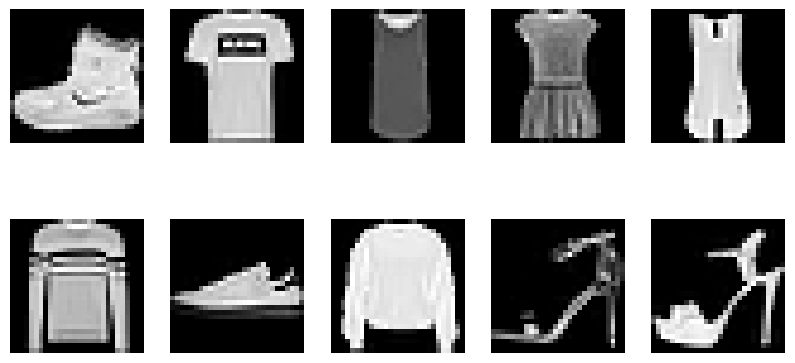

In [ ]:
import matplotlib.pyplot as plt
import torchvision

# 加載數據集
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True)
images = trainset.data[:10]  # 取前10張圖像

# 可視化
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.show()

Epoch [1/5], Loss: 0.6603, Accuracy: 76.52%
Epoch [2/5], Loss: 0.4192, Accuracy: 84.88%
Epoch [3/5], Loss: 0.3731, Accuracy: 86.59%
Epoch [4/5], Loss: 0.3451, Accuracy: 87.63%
Epoch [5/5], Loss: 0.3297, Accuracy: 88.14%


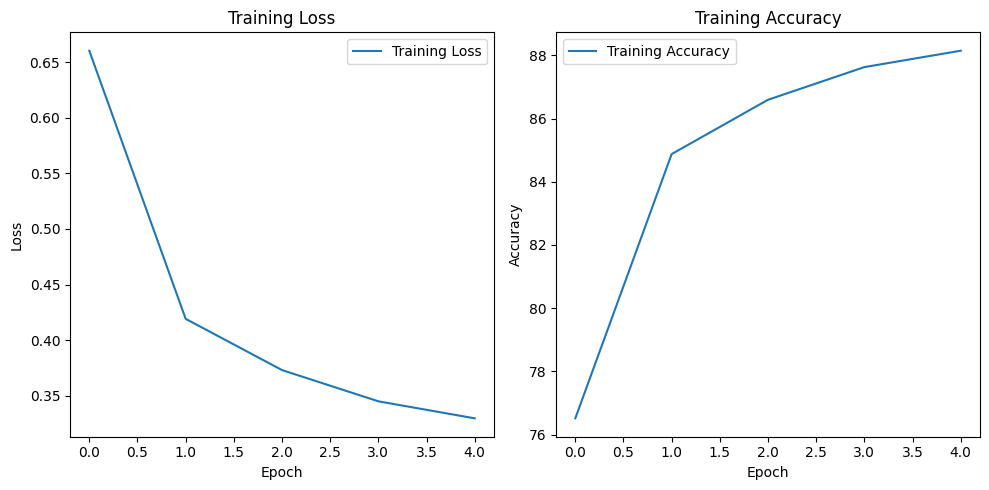

Accuracy of the network on the 10000 test images: 87.15%


In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# 數據加載與預處理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# 定義CNN模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        # We will dynamically calculate the correct size in the forward method
        self.fc1 = nn.Linear(0, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2, 2)

        # Dynamically calculate the size of the flattened tensor
        x = x.view(x.size(0), -1)

        # If fc1 is not initialized with the correct input size, initialize it now
        if self.fc1.in_features == 0:
            self.fc1 = nn.Linear(x.shape[1], 120)

        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# 訓練模型
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Lists to store metrics for plotting
train_losses = []
train_accuracies = []

# Training loop
epochs=5
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate and store metrics for this epoch
    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch [{epoch + 1}/{epochs}}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

# Plotting the metrics
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Testing the model
testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation during testing
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')